In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('teleco-churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We can see that the csv file has 7043 rows and 21 columns with no missing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### List of features that have `datatype` as `object`

In [7]:
categorical_features=df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_features:
    print(i)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


#### List of features that have `datatype` as `int` or `float`

In [8]:
numerical_features=df.select_dtypes(include=['integer', 'float']).columns.tolist()
for i in numerical_features:
    print(i)

SeniorCitizen
tenure
MonthlyCharges


#### Getting a list of possible values for both categorical and numerical features

In [9]:
for cat in categorical_features:
    print(cat)
    print(df[cat].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']


In [10]:
for cat in numerical_features:
    print(cat)
    print(df[cat].unique())

SeniorCitizen
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


#### Removing the not needed columns

In [11]:
df.drop('customerID',axis=1,inplace=True)

#### `Total Charges` need to be converted to `numerical category` for it to be used and
#### `Senior Citizen` need to be converted to `categorical feature` for it to be used

In [12]:
categorical_features.remove('TotalCharges')
numerical_features.append('TotalCharges')

numerical_features.remove("SeniorCitizen")  
categorical_features.append("SeniorCitizen")

#### `Total Charges` need to be converted to numerical because currently in string so we need to identify missing values

In [13]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"],errors="coerce")
print("Missing values in TotalCharges are:", df["TotalCharges"].isna().sum())

Missing values in TotalCharges are: 11


In [14]:
df["TotalCharges"].fillna(0, inplace=True)
print(df["TotalCharges"].dtype)
print(df.loc[df["tenure"]==0,["tenure","TotalCharges"]].head())

float64
      tenure  TotalCharges
488        0           0.0
753        0           0.0
936        0           0.0
1082       0           0.0
1340       0           0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df["TotalCharges"].fillna(0,inplace=True)

print(df["TotalCharges"].dtype)
print(df.loc[df["tenure"]==0,["tenure","TotalCharges"]].head())

float64
      tenure  TotalCharges
488        0           0.0
753        0           0.0
936        0           0.0
1082       0           0.0
1340       0           0.0


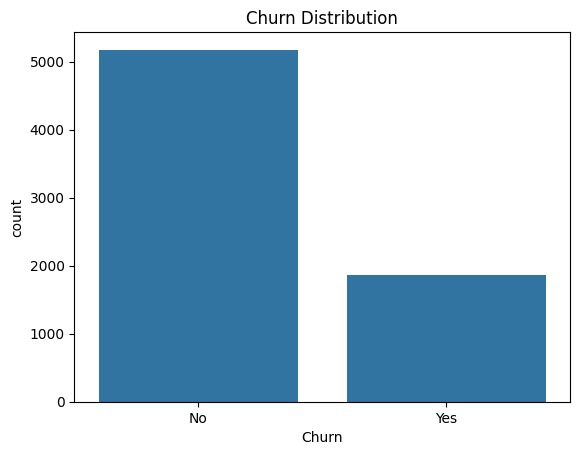

In [17]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

#### Ratio of customers who stayed (No) vs who churned (Yes)

In [18]:
churn_rate=df["Churn"].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)

Churn Rate:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [19]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### So the dataset is highly imbalanced

#### Churn% vs Categorical Features

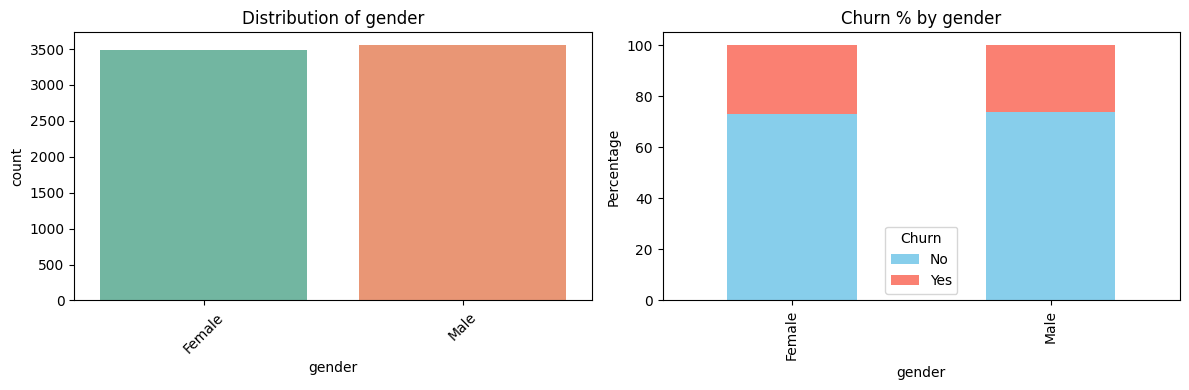

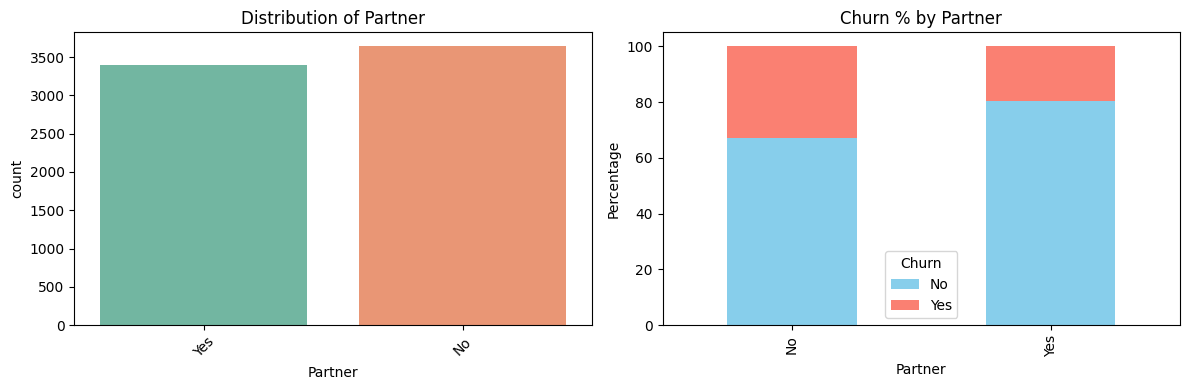

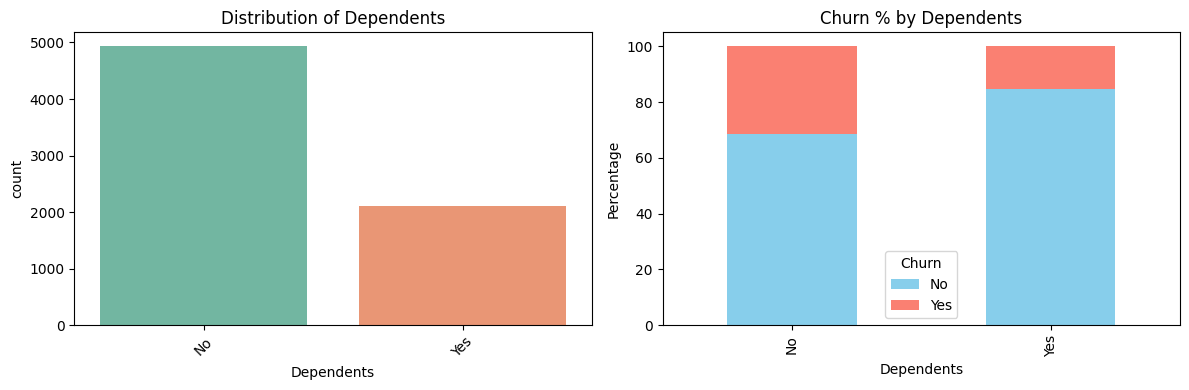

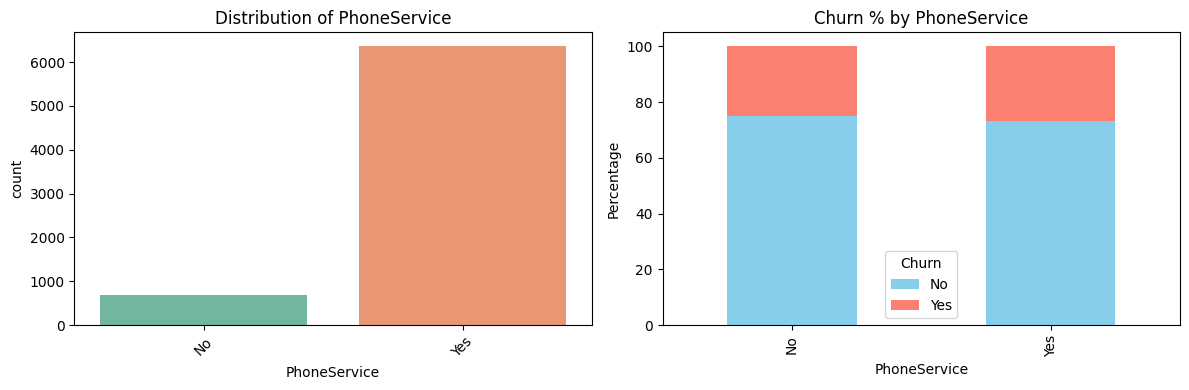

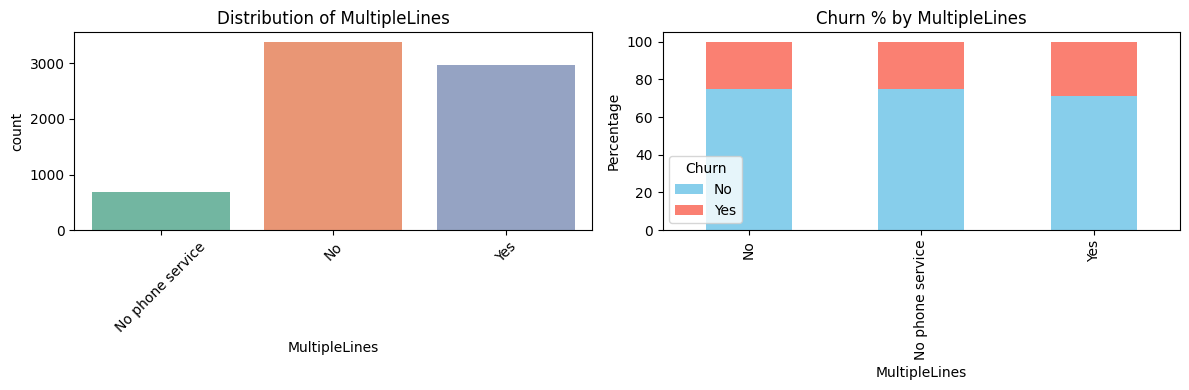

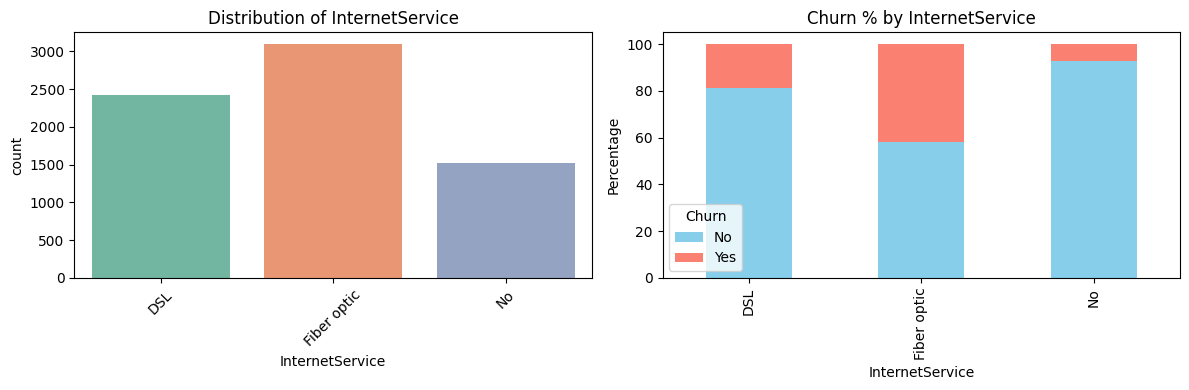

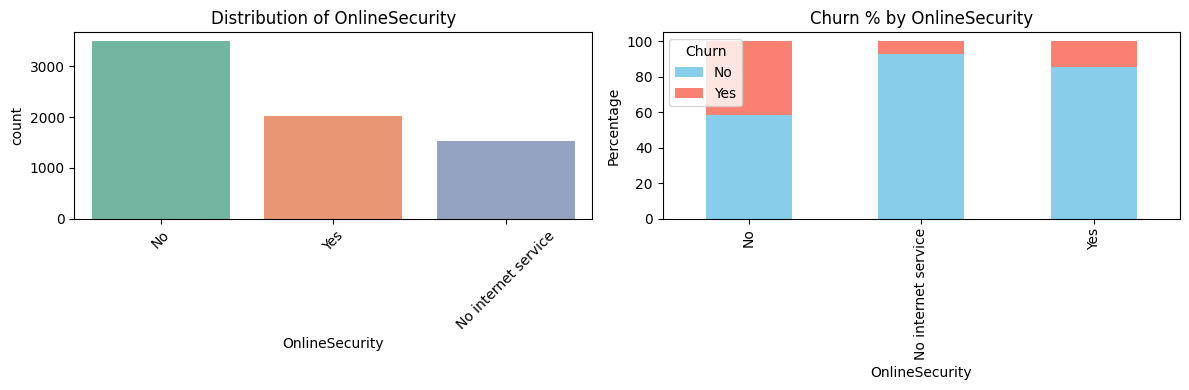

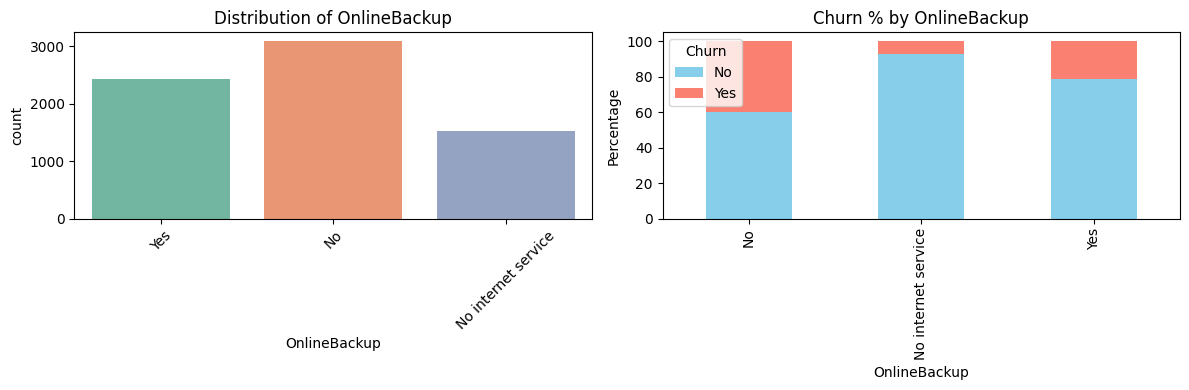

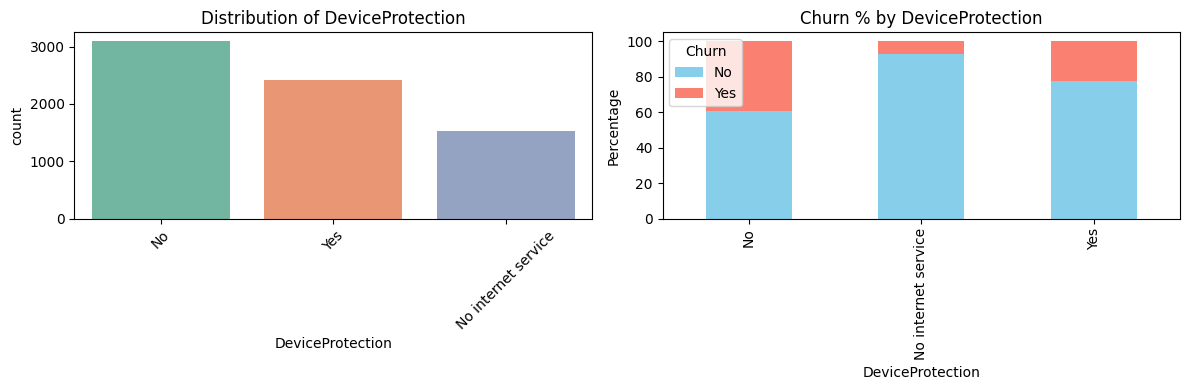

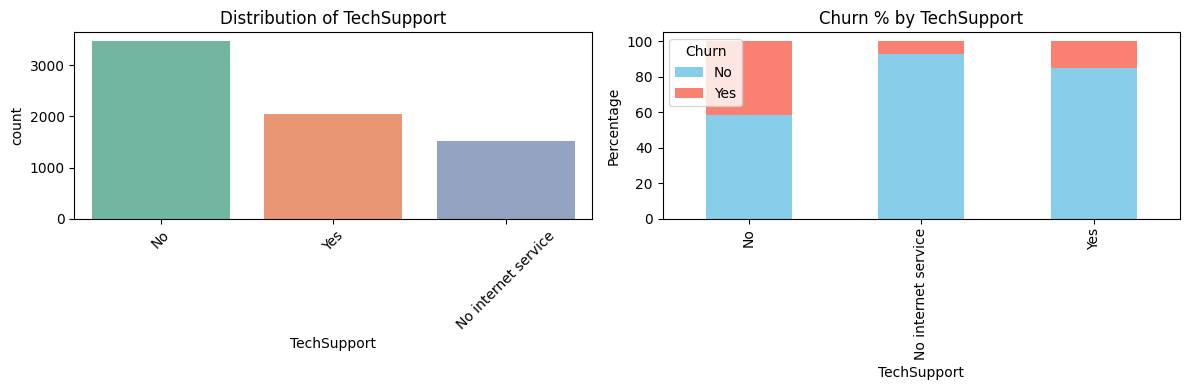

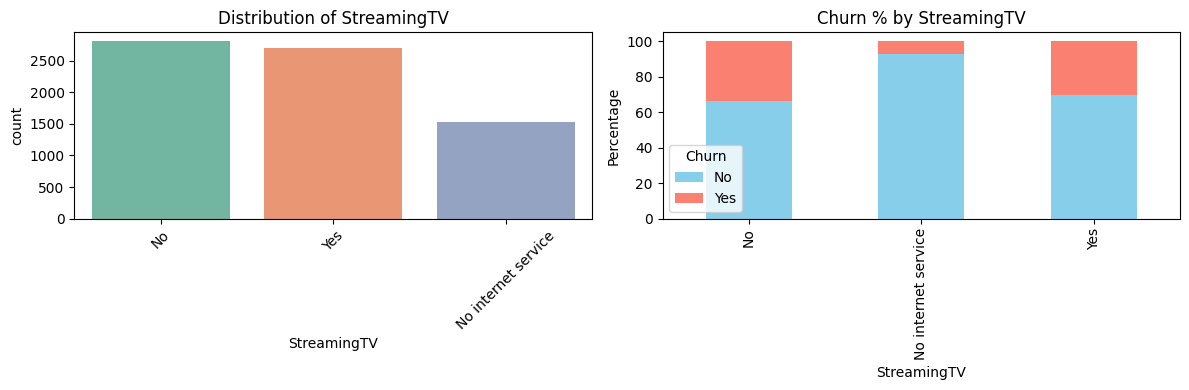

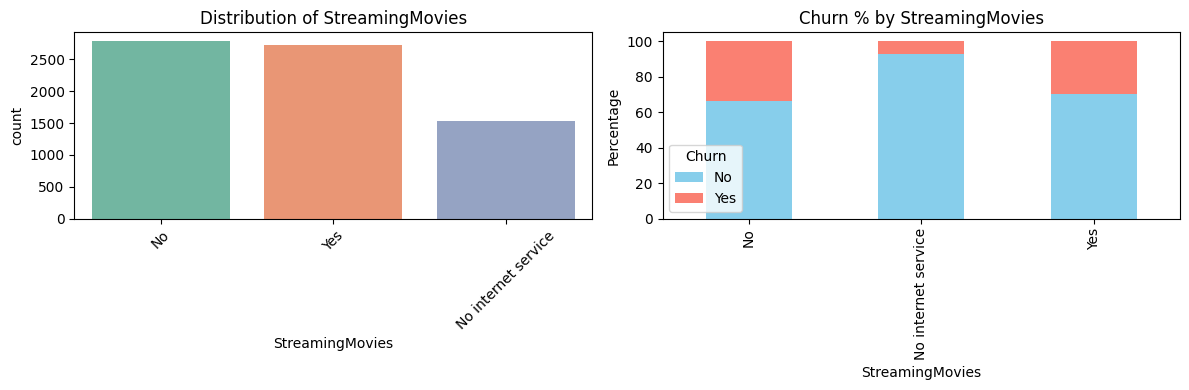

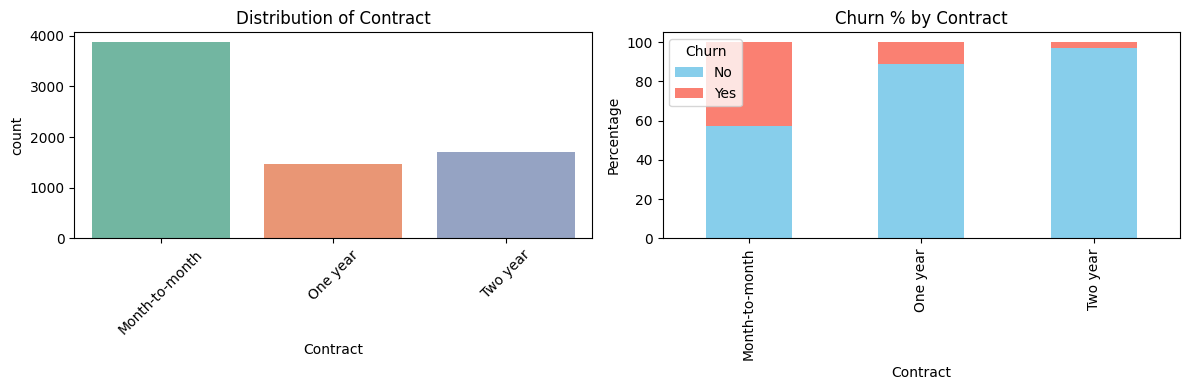

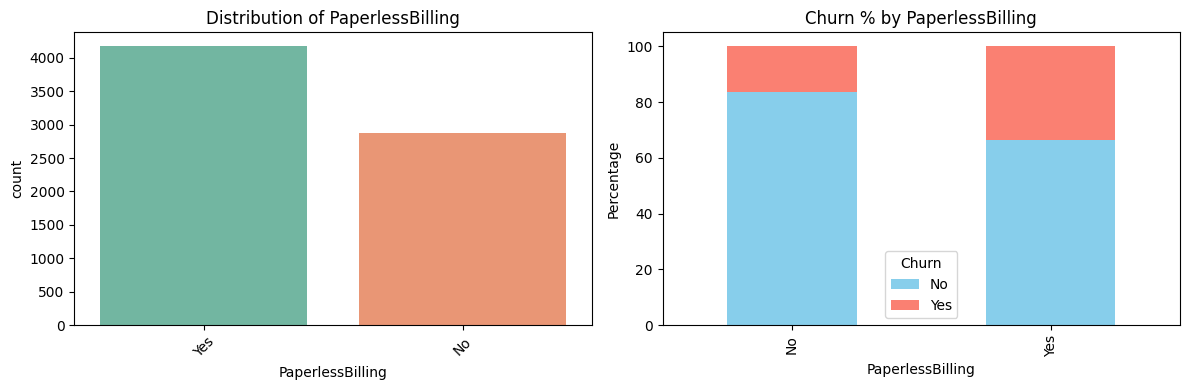

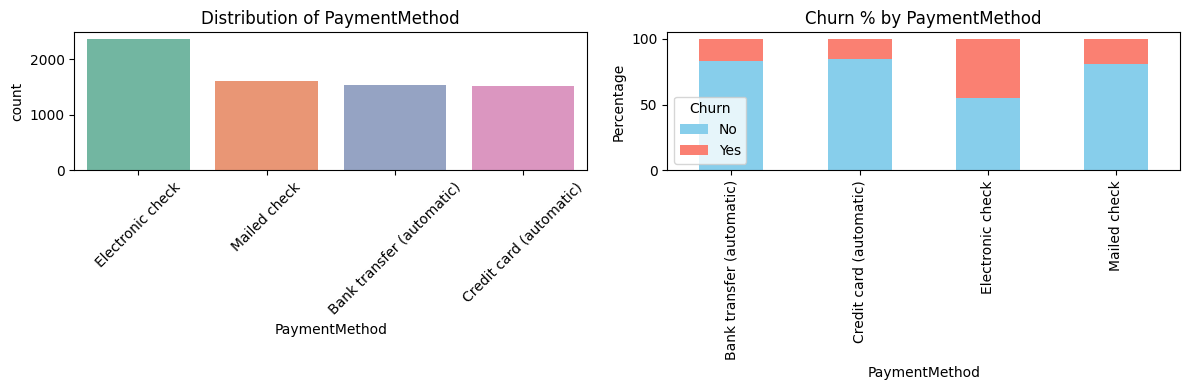

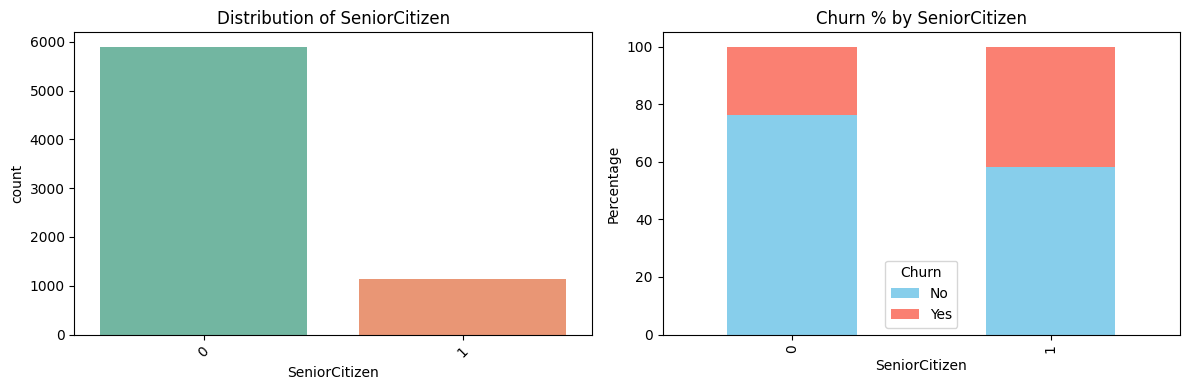

In [20]:
for col in categorical_features:
    if col not in df.columns or col == "Churn":  # skip missing or target
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    sns.countplot(x=col, data=df, ax=axes[0], palette="Set2")
    axes[0].set_title(f"Distribution of {col}")
    axes[0].tick_params(axis='x', rotation=45)

    churn_dist = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_dist.plot(kind='bar', stacked=True, color=['skyblue','salmon'], ax=axes[1])
    axes[1].set_title(f"Churn % by {col}")
    axes[1].set_ylabel("Percentage")
    axes[1].legend(title="Churn")

    plt.tight_layout()
    plt.show()


#### Churn% vs Numerical Features

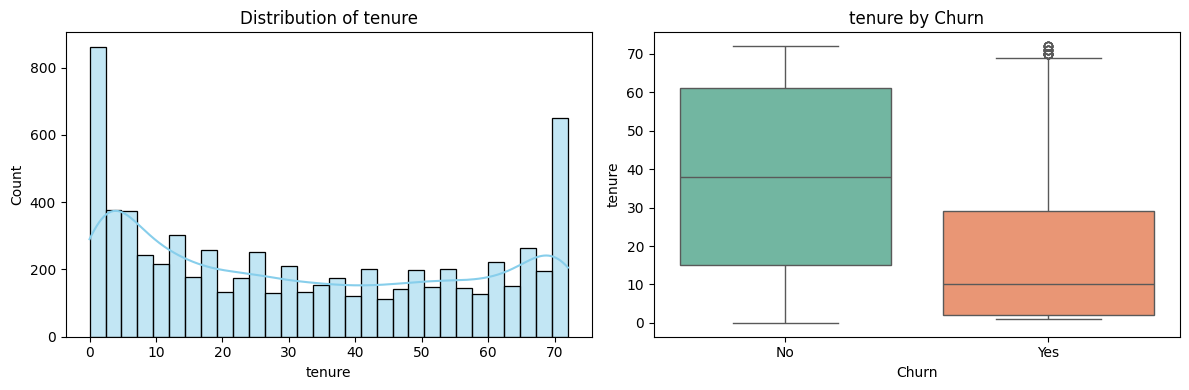

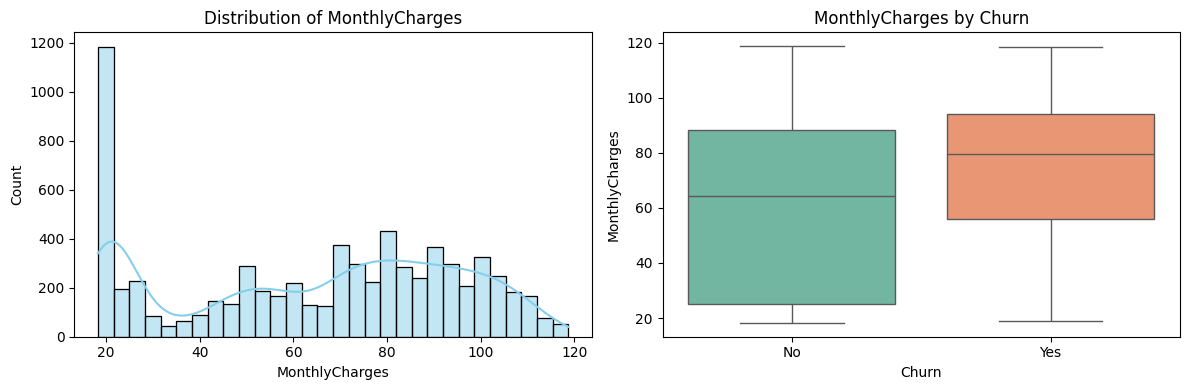

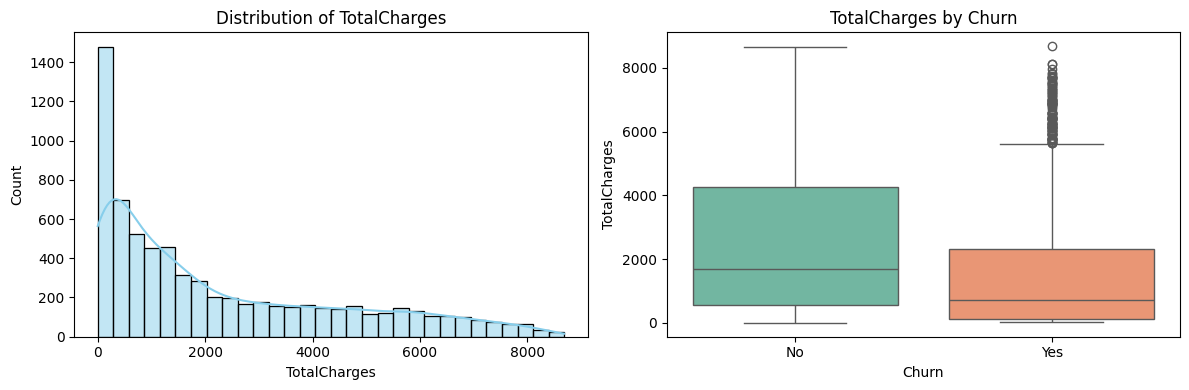

In [21]:
for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Left: Distribution (histogram)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution of {col}")

    # Right: Boxplot vs Churn
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=axes[1])
    axes[1].set_title(f"{col} by Churn")

    plt.tight_layout()
    plt.show()

#### From `Distribution of Tenure` we can see that the newer customers are more likely to churn.
#### From `Distribution of Monthly Charges` we can see that the Customers paying higher bills are more likely to churn
#### From `Distribution of Total Charges` we can see that Churners are mostly early leavers they dont accumulate higher total charges

#### Certain categorical variables such as `OnlineSecurity`, `DeviceProtection` #### etc, contain redundant labels like `No internet service`. These are merged #### into a  single category (‘No’) to simplify modeling.”

In [22]:
replace_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service':'No', 'No phone service':'No'})

#### Instead of using monthly charges we can use average charges per month using  `AvgChargesPerMonth = TotalCharges / (tenure+1)`  which shows how much a    customer pays on average each month, avoiding division by zero with +1.

In [23]:
df['AvgChargesPerMonth']=(df['TotalCharges'])/(df['tenure']+1)

## Logarithmic Conversion of skewed data
#### `Tenure`: Distribution was U-shaped / bimodal (lots of new customers, lots of loyal long-term ones). Log transform won’t help much, because 0–72 months is a bounded range, not extreme.

#### `TotalCharges`: This was the one with a strong right skew. We will use the Logarithmic transformation here.

In [24]:
df['LogTotalCharges']=np.log1p(df['TotalCharges'])

### Binary encoding for Yes/No

In [25]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    df[col] =df[col].map({'Yes':1,'No':0})

### One-Hot Encoding for multi-category features

In [27]:
multi_cat_cols = ['Contract_One year','Contract_Two year','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','InternetService_Fiber optic','InternetService_No','gender_Male']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

KeyError: "None of [Index(['Contract_One year', 'Contract_Two year',\n       'PaymentMethod_Credit card (automatic)',\n       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',\n       'InternetService_Fiber optic', 'InternetService_No', 'gender_Male'],\n      dtype='object')] are in the [columns]"

In [28]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'AvgChargesPerMonth',
       'LogTotalCharges'],
      dtype='object')


#### Now we will see how each feature relate to Churn individually

In [29]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Convert categorical to numeric
X_encoded = pd.get_dummies(X, drop_first=True)

# Use encoded version here (not X)
selector = SelectKBest(score_func=f_classif, k=10)   # pick top 10
X_new = selector.fit_transform(X_encoded, y)

# Get the selected features
selected_features = X_encoded.columns[selector.get_support()]
print("Top selected features:\n", selected_features)

Top selected features:
 Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'LogTotalCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


#### Model Building & Evaluation

In [30]:
from sklearn.model_selection import train_test_split

X=X_encoded
y=df["Churn"]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

#### Training the models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.8076650106458482
Confusion Matrix:
 [[938  97]
 [174 200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Decision Tree:
Accuracy: 0.7274662881476224
Confusion Matrix:
 [[843 192]
 [192 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Random Forest:
Accuracy: 0.7920511000709723
Confusion Matrix:
 [[923 112]
 [181 193]]
Classification Report:
        

#### The best model we can see is Logistic Regression model so we will chose this and will try to improve the accuracy

In [32]:
log_reg_balanced=LogisticRegression(max_iter=1000, class_weight="balanced",random_state=42)
log_reg_balanced.fit(X_train, y_train)

y_pred_bal=log_reg_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_bal))

Accuracy: 0.7416607523066004
Confusion Matrix:
 [[748 287]
 [ 77 297]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {0: 4139, 1: 1495}
After SMOTE: {0: 4139, 1: 4139}


ROC-AUC Score: 0.8465163140354958


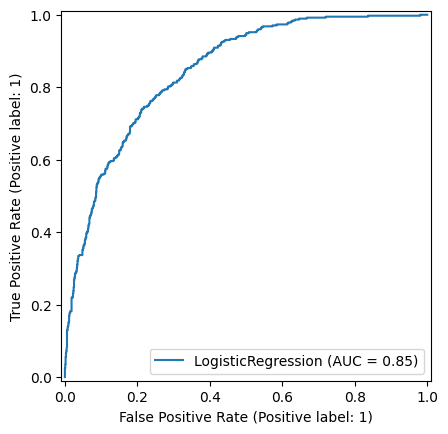

In [34]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_pred_proba = log_reg_balanced.predict_proba(X_test)[:,1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

RocCurveDisplay.from_estimator(log_reg_balanced, X_test, y_test)
plt.show()


#### Now we build a model stack

#### We stacked Logistic Regression, Decision Tree, and Random Forest as base models, using Logistic Regression as the meta-learner. The meta-model learns from the predictions of the base models, improving accuracy and generalization.

In [37]:
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [38]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', log_clf),
    ('dt', dt_clf),
    ('rf', rf_clf)
]

stack_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,   # 5-fold cross validation
    n_jobs=-1
)

stack_clf.fit(X_train_res, y_train_res)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [39]:
y_pred_stack = stack_clf.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

# AUC Score
y_pred_proba = stack_clf.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Stacking Accuracy: 0.7714691270404542
Confusion Matrix:
 [[859 176]
 [146 228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

ROC-AUC Score: 0.8198610142344157


#### Our results match the paper: stacking (Logistic, DT, RF) gave only marginal gains, with similar cross-validation and hold-out scores, showing no overfitting. Logistic Regression with SMOTE achieved the best balance of churn recall and overall accuracy.